# <div align = 'center'> Lectura 9 Series de Tiempo V</div>
### Contenido
  <div align = 'left'>
      <font color = 'steelblue' size = 4>
        8.1 Modelo de promedios móviles autorregresivos (ARMA)<br>
          </font>
        </div>

## Modelo de promedios móviles autorregresivos (ARMA)

El modelo ARMA es la combinación de los modelos $ AR (p) $ y $ MA (q) $:

* $ AR (p) $: intenta explicar el efecto de impulso de la serie.
* $ MA (q) $: intenta capturar el efecto del ruido en la serie. Este efecto se puede interpretar como eventos inesperados que afectan la observación.

El modelo creado está representado por la ecuación:

$ {\displaystyle X_{t} = c + \varepsilon_{t} + \sum _{i = 1}^{p} \beta_{i} X_{t-i} + \sum_{i=1}^{q} \theta_{i} \varepsilon_ {t-i}.} $

Encontrar los valores apropiados de $ {\displaystyle p} $ y $ {\displaystyle q} $ en el modelo $ ARMA ({\displaystyle p, q}) $ se puede facilitar asignando las funciones de autocorrelación parcial a un valor estimado de $ {\displaystyle p} $ y de manera similar usa las funciones de autocorrelación para un valor estimado de $ {\displaystyle q} $. Se puede obtener más información considerando las mismas funciones para los residuos de un modelo equipado con una selección inicial de $ {\displaystyle p} $ y $ {\displaystyle q} $.

Para probar el uso del modelo $ ARMA (p, q) $ trabajaremos con los datos meteorológicos contenidos en el archivo ```clima_india```.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('clima_india.csv')
df.date = pd.to_datetime(df.date)
df.set_index('date', inplace=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


Crearemos el modelo para pronosticar la velocidad del viento del día, que se muestra en la columna ```wind_speed```. A continuación, los tiempos de visualización de la serie temporal.

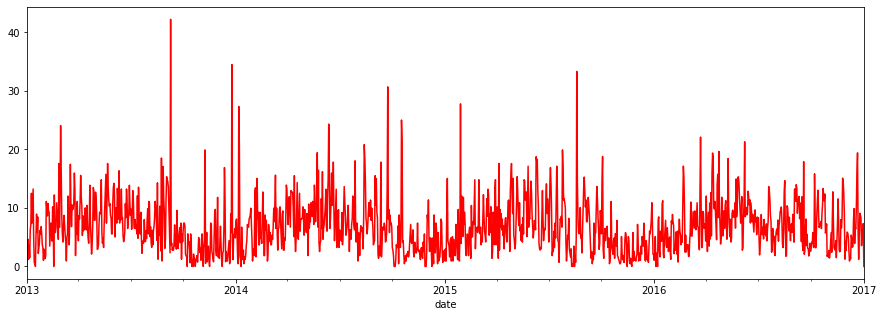

In [3]:
df.wind_speed.plot(figsize=(15, 5), c='r')

In [4]:
seasonal_dec = seasonal_decompose(df.wind_speed, period = 7)

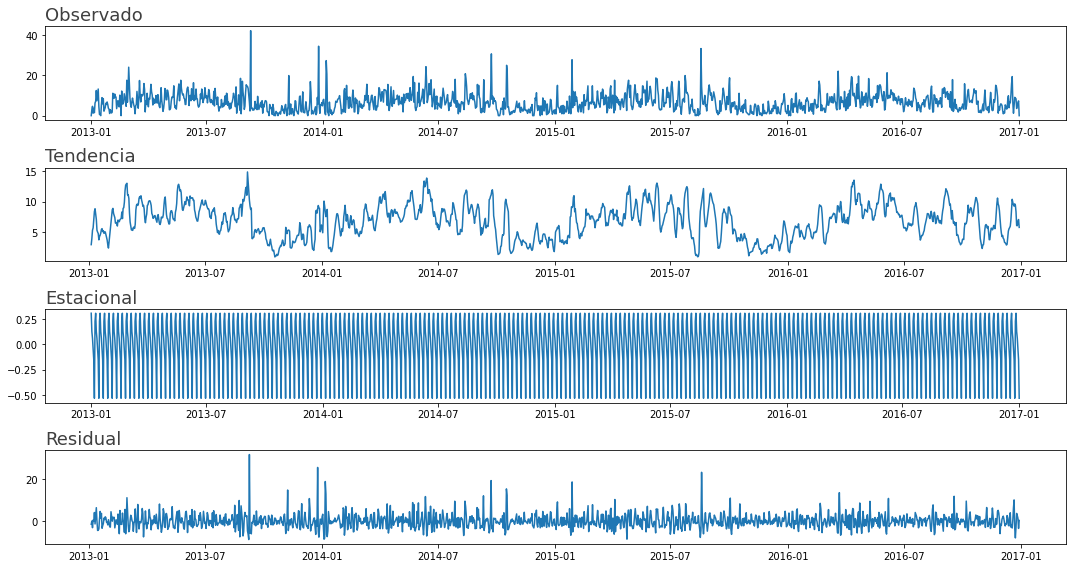

In [19]:
ax, fig = plt.subplots(figsize=(15,8), sharex=True)

plt.subplot(411)
plt.plot(df.wind_speed, label="Original")
plt.title("Observado",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(seasonal_dec.trend, label="Tendencia")
plt.title("Tendencia",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal_dec.seasonal, label="Estacional")
plt.title("Estacional",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(seasonal_dec.resid, label="Residual")
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

Crearemos un modelo ARMA (2, 2) usando la clase ```ARMA``` presente en el subpaquete ``` from statsmodels.tsa.arima_model```. La clase recibe como parámetro la ```Serie``` que contiene la serie temporal, la frecuencia ```freq``` y el orden  ```order = (p, q)```.

In [20]:
from statsmodels.tsa.arima_model import ARMA

arma_2_2 = ARMA(df.wind_speed, freq='D', order=(2, 2)).fit()
print(arma_2_2.summary())

                              ARMA Model Results                              
Dep. Variable:             wind_speed   No. Observations:                 1462
Model:                     ARMA(2, 2)   Log Likelihood               -4109.395
Method:                       css-mle   S.D. of innovations              4.022
Date:                Fri, 27 Aug 2021   AIC                           8230.791
Time:                        17:15:32   BIC                           8262.516
Sample:                    01-01-2013   HQIC                          8242.625
                         - 01-01-2017                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.7206      0.569     11.820      0.000       5.606       7.835
ar.L1.wind_speed     1.2139      0.084     14.534      0.000       1.050       1.378
ar.L2.wind_speed    -0.2249 

In [21]:
(arma_2_2.resid ** 2).mean()

16.181779370614482

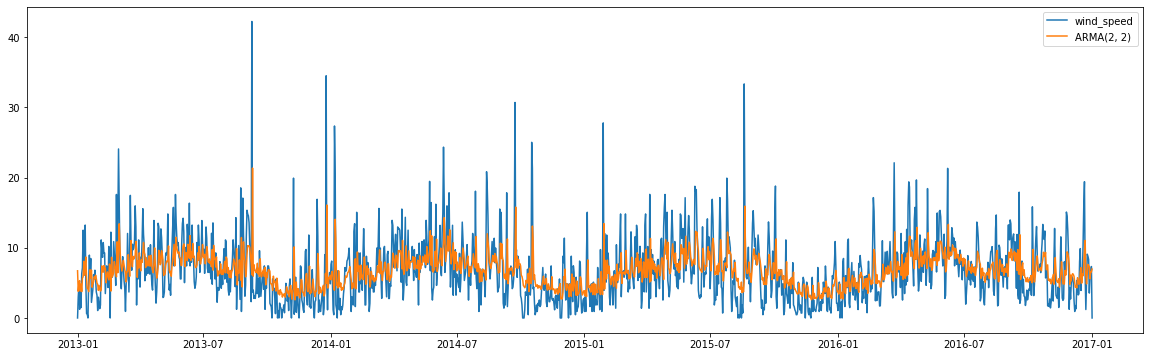

In [22]:
plt.figure(figsize=(20, 6))
plt.plot(df.wind_speed)
plt.plot(arma_2_2.predict())
plt.legend(['wind_speed', 'ARMA(2, 2)'])

Haremos la validación _train / test_ considerando que el tamaño $ n $ del conjunto de entrenamiento es 2/3 del conjunto original.

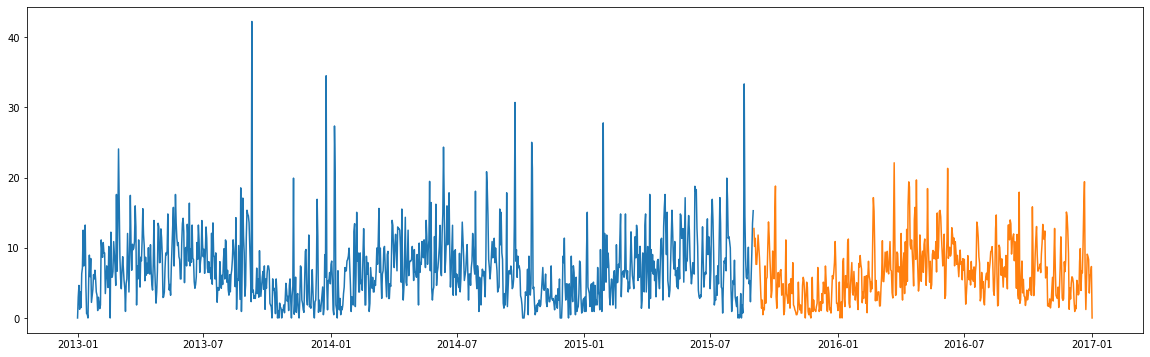

In [23]:
n = int(len(df.wind_speed) * 2/3)
train_set = df.wind_speed[:n]
test_set = df.wind_speed[n:]

plt.figure(figsize=(20, 6))
plt.plot(train_set)
plt.plot(test_set)

Crearemos el modelo ARMA (2, 2) a partir del conjunto ```train_set``` y accederemos a los parámetros del modelo a través del atributo ```params```.

In [24]:
arma_train = ARMA(train_set, freq='D', order=(2, 2)).fit()
print(arma_train.summary())

                              ARMA Model Results                              
Dep. Variable:             wind_speed   No. Observations:                  974
Model:                     ARMA(2, 2)   Log Likelihood               -2808.255
Method:                       css-mle   S.D. of innovations              4.323
Date:                Fri, 27 Aug 2021   AIC                           5628.509
Time:                        17:15:42   BIC                           5657.798
Sample:                    01-01-2013   HQIC                          5639.655
                         - 09-01-2015                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.9128      0.653     10.592      0.000       5.634       8.192
ar.L1.wind_speed     1.2123      0.112     10.871      0.000       0.994       1.431
ar.L2.wind_speed    -0.2235 

In [25]:
arma_train.params

const               6.912787
ar.L1.wind_speed    1.212280
ar.L2.wind_speed   -0.223550
ma.L1.wind_speed   -0.874822
ma.L2.wind_speed   -0.069501
dtype: float64

Para aplicar el modelo creado al conjunto de prueba ```test_set```, crearemos el modelo de prueba llamado ```arm_test``` pasando los parámetros del modelo creado a partir del conjunto de entrenamiento como parámetro la función ```fit() ```.

In [26]:
arma_test = ARMA(test_set, freq='D', order=(2, 2)).fit(arma_train.params)
(arma_test.resid ** 2).mean()

10.884654473058644

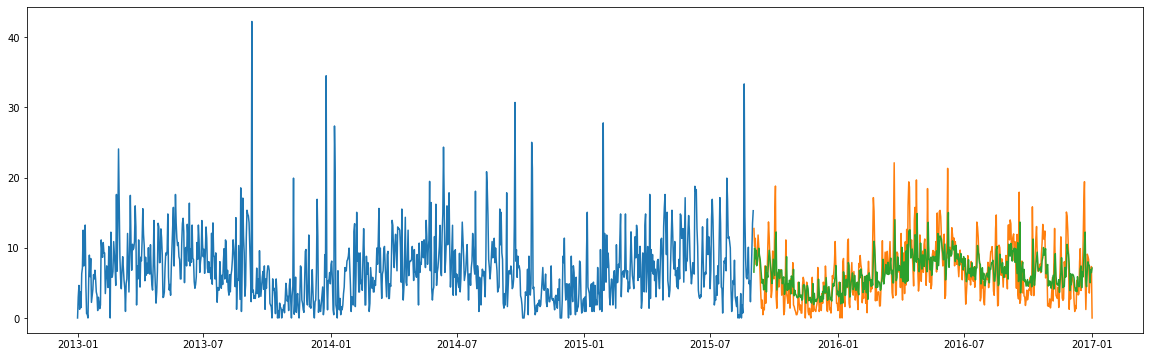

In [26]:
plt.figure(figsize=(20, 6))
plt.plot(train_set)
plt.plot(test_set)
plt.plot(arma_test.predict())

Probaremos tres configuraciones para el modelo ARMA:
* $(p, q) =(1, 1)$
* $(p, q) =(2, 2)$
* $(p, q) =(3, 3)$

In [27]:
arma1 = ARMA(train_set, freq='D', order=(1, 1)).fit()
arma2 = ARMA(train_set, freq='D', order=(2, 2)).fit()
arma3 = ARMA(train_set, freq='D', order=(3, 3)).fit()

In [29]:
arma1_t = ARMA(test_set, freq='D', order=(1, 1)).fit(arma1.params)
arma2_t = ARMA(test_set, freq='D', order=(2, 2)).fit(arma2.params)
arma3_t = ARMA(test_set, freq='D', order=(3, 3)).fit(arma3.params)

In [29]:
print((arma1_t.resid ** 2).mean()) 
print((arma2_t.resid ** 2).mean()) 
print((arma3_t.resid ** 2).mean()) 

11.453649280939048
10.884654540723051
10.825277612522145


El mejor resultado obtenido fue con la configuración $ (p, q) = (3, 3) $.

A continuación, tenemos la actualización de los tres modelos.

In [30]:
print(arma3_t.summary())

                              ARMA Model Results                              
Dep. Variable:             wind_speed   No. Observations:                  488
Model:                     ARMA(3, 3)   Log Likelihood               -1273.311
Method:                       css-mle   S.D. of innovations              3.285
Date:                Fri, 27 Aug 2021   AIC                           2562.622
Time:                        17:16:31   BIC                           2596.145
Sample:                    09-02-2015   HQIC                          2575.790
                         - 01-01-2017                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.5286      0.895      7.295      0.000       4.774       8.283
ar.L1.wind_speed     0.1686      0.121      1.392      0.164      -0.069       0.406
ar.L2.wind_speed     0.9532 

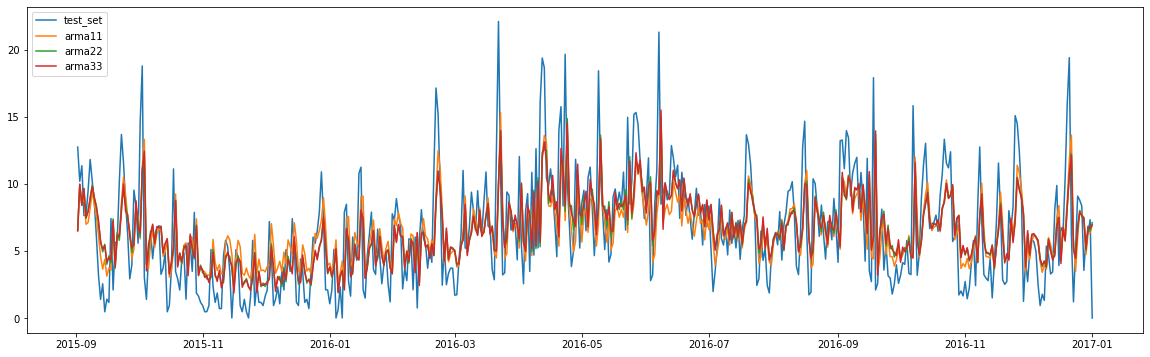

In [31]:
plt.figure(figsize=(20, 6))
plt.plot(test_set)
plt.plot(arma1_t.predict())
plt.plot(arma2_t.predict())
plt.plot(arma3_t.predict())
plt.legend(['test_set', 'arma11', 'arma22', 'arma33'])

Para probar un conjunto de configuraciones, podemos usar un bucle for de python para devolver la mejor configuración.

In [35]:
configs = [(1, 1), (1, 2), (2, 1), (3, 1), (3, 2), (3, 3)]
best = 100000
for config in configs:
    arma = ARMA(train_set, freq='D', order=config).fit()
    arma_test = ARMA(test_set, freq='D', order=config).fit(arma.params)
    erro = (arma_test.resid ** 2).mean()
    if erro < best:
        best = erro
        print(config, erro)

(1, 1) 11.45364927874322
(1, 2) 10.956763960447352
(3, 1) 10.902711470222393
(3, 3) 10.825277482340658
